# Predicting a Pulsar Star

The dataset was obtained from https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate.

Description
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

Credit goes to Pavan Raj (https://www.kaggle.com/pavanraj159) from where the dataset has been collected. For the purpose of creating a challenge, certain modifications have been done to the dataset.

Original dataset can be acquired from the link Predicting a Pulsar Star (https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star)

Attribute Information:
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

## Objectives

From the title of the project, its obvious that the objective is the correct identification of pulsar stars.

This will be a simple prediction and labelling project, with no statistic calculations involved.

## Libraries

The first step is to load the libraries necessary to view and analyze the data as well as the ones to create the prediction models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import missingno as msno

## Loading and Analysing the Files

There are two `csv` files:
+ `pulsar_data_test.csv`, with the testing data;
+ `pulsar_data_train.csv`, with the training data;

### Test data

In [2]:
test_set = pd.read_csv("pulsar_data_test.csv")
test_set.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


### Train data

In [3]:
train_set = pd.read_csv("pulsar_data_train.csv")
train_set.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


## Renaming columns

In order to be able to easyli manipulate the dataframes, the columns will be renamed.

In [4]:
new_names = ["Mean_IP", "STD_IP", "EK_IP", "SK_IP", "Mean_DMSNR", "STD_DMSNR", "EK_DMSNR", "SK_DMSNR", "target_class"]
test_set.columns = new_names
train_set.columns = new_names

### Missing Data

The missing data will affect the accuracy of the prediction models, so it's necessary to handle those missing values.

In [5]:
def missing(dataset):
    return dataset.isnull().sum(), msno.matrix(dataset.sample(5370))


#### Test set 

(Mean_IP            0
 STD_IP             0
 EK_IP            767
 SK_IP              0
 Mean_DMSNR         0
 STD_DMSNR        524
 EK_DMSNR           0
 SK_DMSNR         244
 target_class    5370
 dtype: int64,
 <AxesSubplot:>)

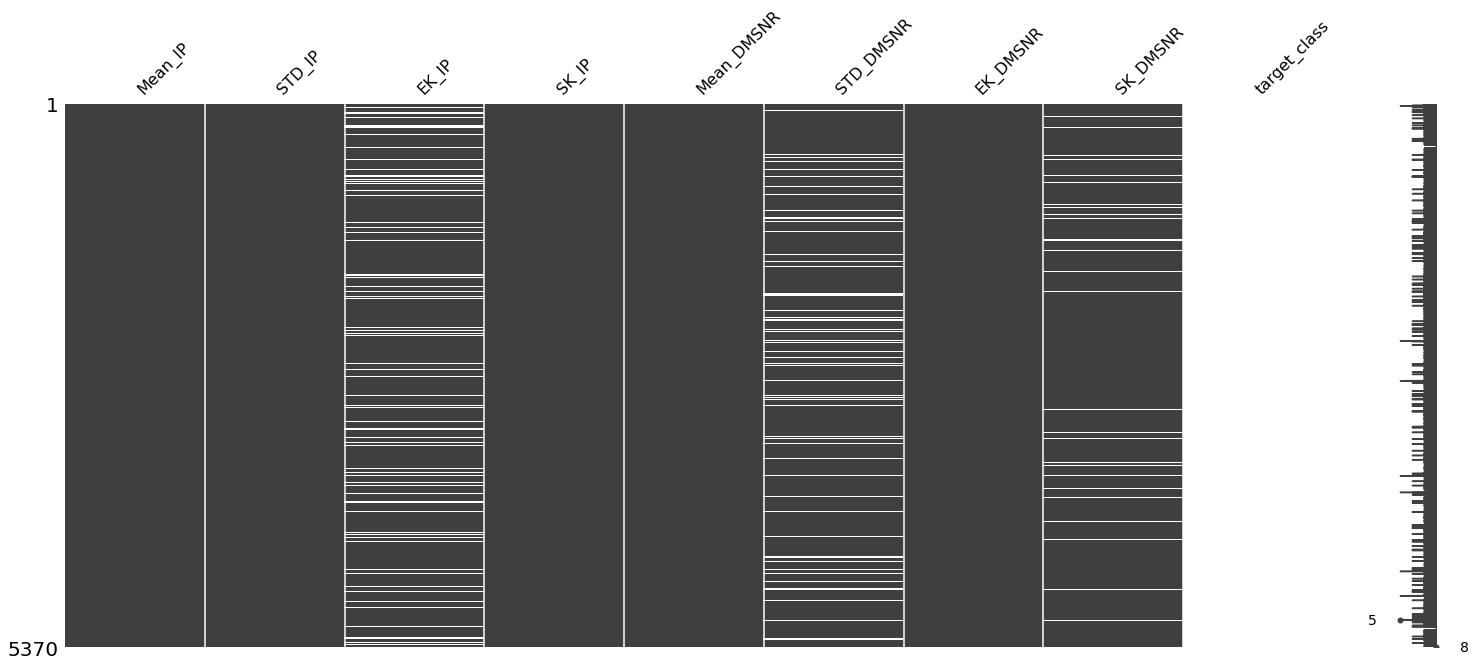

In [6]:
missing(test_set)

There are a lot of missing values in three variables (the fourth is the classifications, wich in this dataset is empty), but accordingly to the graph they cannot be simply removed, or the sample size would be greatly reduced.

#### Train set

(Mean_IP            0
 STD_IP             0
 EK_IP           1735
 SK_IP              0
 Mean_DMSNR         0
 STD_DMSNR       1178
 EK_DMSNR           0
 SK_DMSNR         625
 target_class       0
 dtype: int64,
 <AxesSubplot:>)

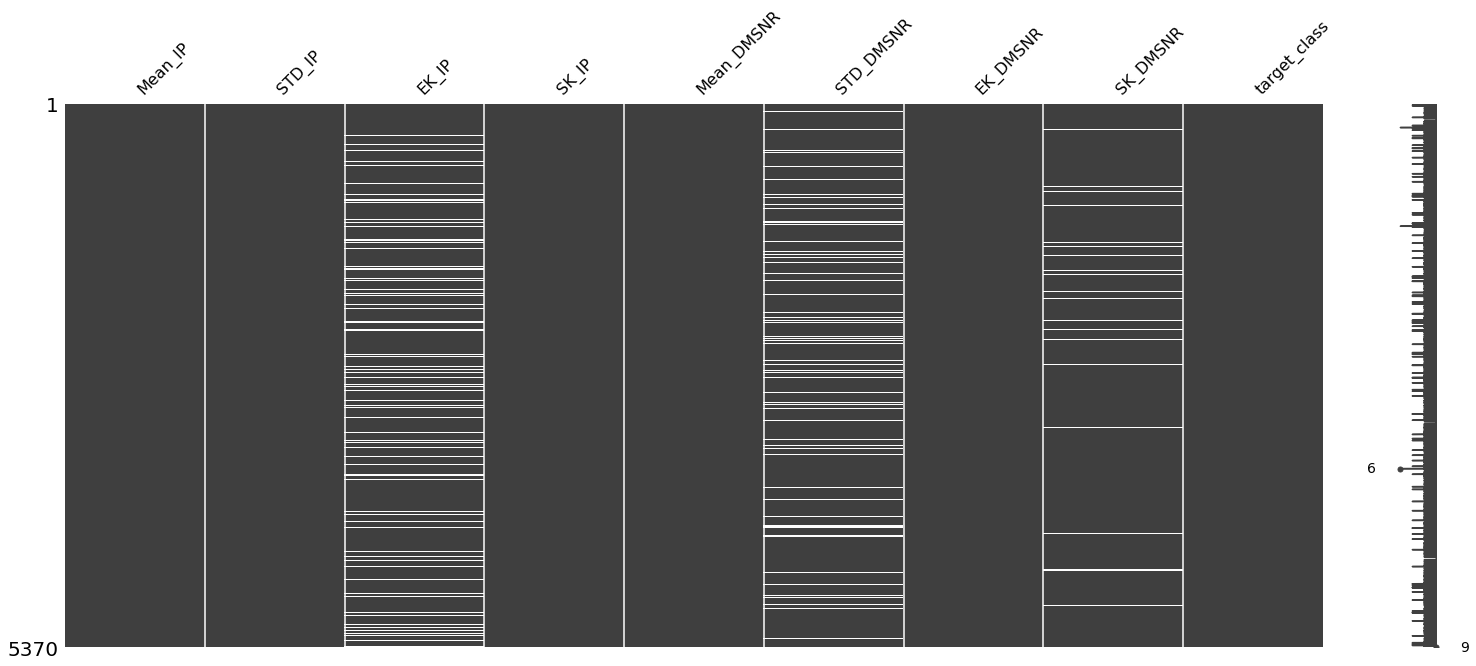

In [7]:
missing(train_set)

In this set there are a lot more missing values compared to the `test_set`.

Now that we have a sense of how the missing values are distributed, and their dimension, it's important to define a method to tackle this issue.

### Data distribution

In order to better understand if all of this variables afect the classification of the stars, two models of machine learning will be implemented: one wich all of the variables enter the equation, and one where only the variables considered relevant come into play. 

To do this first we will need to divide the `train_set` into to two, depending on the target class.

In the `test_set`, since the classification is not defined, the column `target_class` will be eliminated.

In [8]:
# dividing the train_set
not_pulsar = train_set[train_set['target_class'] == 0]
#not_pulsar.head()

pulsar = train_set[train_set['target_class'] == 1]
#pulsar.head()

# eliminating the classification column from test_set
test_set = test_set.drop(["target_class"], axis=1)
#test_set.columns

#### Calculating Statistics

To get a better sense of the data that afect the prediction of pulsar stars, a satistics analysis will be perfomed to get a better sense of the data.

Before checking the influence between variables, its important to see the spread of the data. This will be performed using plots to see the means, medians and standard deviations, and to see if there are a considerable amount of outliers.

The graphs will be:
+ histograms
+ box plots

##### Means, medians and spread

In [9]:
# data spread function
class Spread:
    
    def __init__(self, dataset):
        self.dataset = dataset
    
    def sum_stats(self):
        #Each column mean
        print("Average:")
        print(self.dataset.mean())
        print("\n")

        #Each column median
        print("Median:")
        print(self.dataset.median())
        print("\n")

        #Each column standard deviation
        print("Standard Deviation:")
        print(self.dataset.std())
        print("\n")
    
    #histograms
    def hist(self):
        df = self.dataset
        plt.figure(figsize = (20, 15))
        rows = len(df.columns) / 3
        for i in range(1, len(df.columns)):
            plt.subplot(rows, 3, i)
            plt.hist(df[df.columns[i - 1]])
            plt.title(df.columns[i - 1])
            
    #box plots
    def box(self):
        plt.figure(figsize = (15, 10))
        df = self.dataset.drop(["target_class"], axis=1)
        chart = sns.boxplot(data = df)
        chart.set_xticklabels(chart.get_xticklabels(), rotation = "vertical")
        plt.title("Box Plots")

        
#overlapping histograms
def over_hist(df1, df2):
    plt.figure(figsize = (20, 15))
    for i in range(1, len(df1.columns)):
        plt.subplot(len(df1.columns) / 3, 3, i)
        plt.hist(df1[df1.columns[i - 1]], alpha = 0.5)
        plt.hist(df2[df2.columns[i - 1]], alpha = 0.5)
        plt.title(df1.columns[i - 1])
        plt.legend(["Pulsar star", "Non pulsar star"])

###### Pulsar set

Average:
Mean_IP         56.522990
STD_IP          38.708515
EK_IP            3.123432
SK_IP           15.566358
Mean_DMSNR      49.913590
STD_DMSNR       56.921437
EK_DMSNR         2.780529
SK_DMSNR        17.939904
target_class     1.000000
dtype: float64


Median:
Mean_IP         54.296875
STD_IP          37.534642
EK_IP            2.965753
SK_IP           11.238433
Mean_DMSNR      33.880435
STD_DMSNR       59.795023
EK_DMSNR         1.890020
SK_DMSNR         2.482176
target_class     1.000000
dtype: float64


Standard Deviation:
Mean_IP         29.816937
STD_IP           7.873757
EK_IP            1.875355
SK_IP           14.140326
Mean_DMSNR      45.134002
STD_DMSNR       19.733430
EK_DMSNR         3.208045
SK_DMSNR        46.928676
target_class     0.000000
dtype: float64




C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


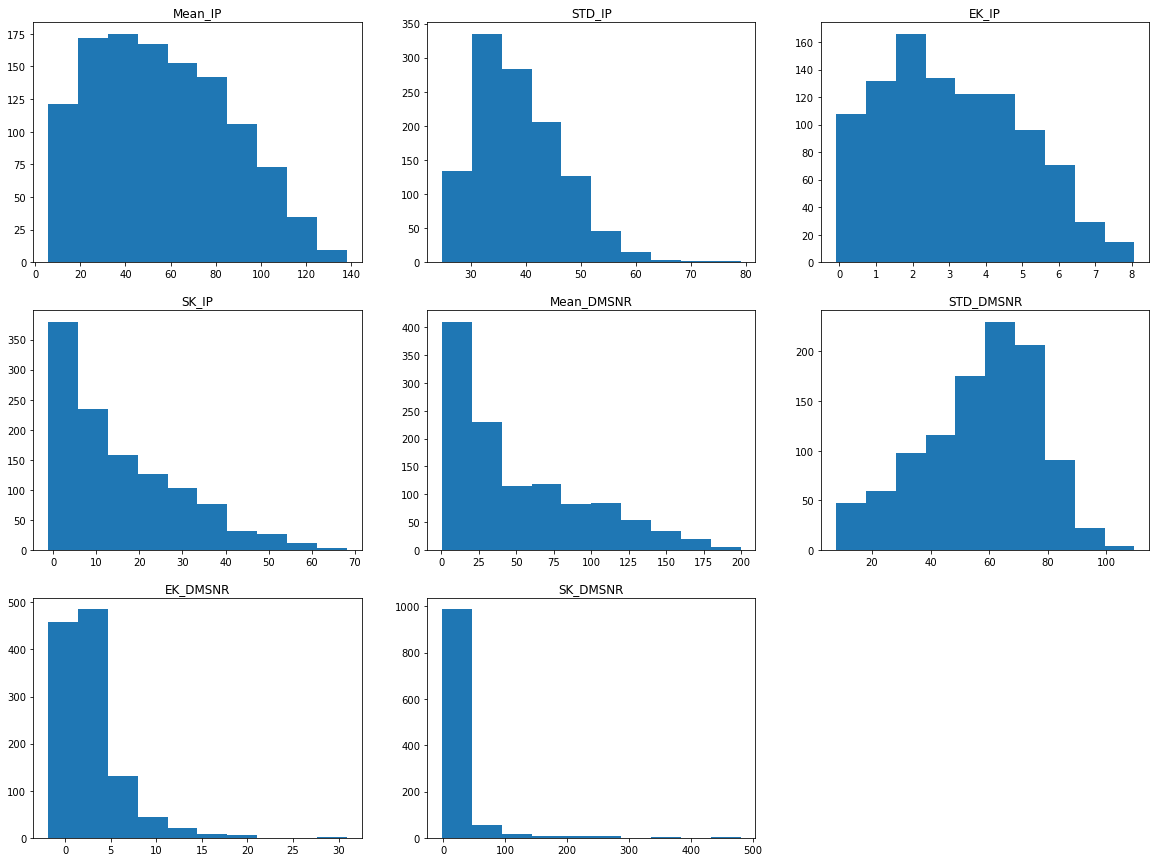

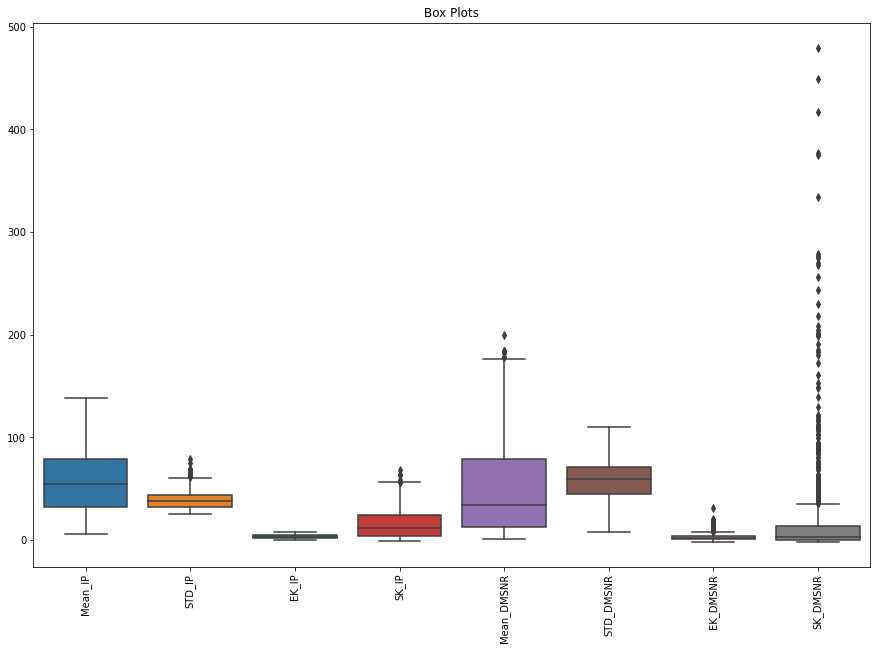

In [10]:
pulsar_stats = Spread(pulsar)
pulsar_stats.sum_stats()
pulsar_stats.hist()
pulsar_stats.box()

###### Non pulsar set

Average:
Mean_IP         116.568016
STD_IP           47.313376
EK_IP             0.209956
SK_IP             0.380851
Mean_DMSNR        8.900132
STD_DMSNR        23.241487
EK_DMSNR          8.896352
SK_DMSNR        114.363754
target_class      0.000000
dtype: float64


Median:
Mean_IP         117.343750
STD_IP           47.460343
EK_IP             0.185609
SK_IP             0.130436
Mean_DMSNR        2.626254
STD_DMSNR        17.570435
EK_DMSNR          8.778976
SK_DMSNR         90.672292
target_class      0.000000
dtype: float64


Standard Deviation:
Mean_IP          17.435963
STD_IP            6.152175
EK_IP             0.330590
SK_IP             0.987840
Mean_DMSNR       24.590521
STD_DMSNR        16.714756
EK_DMSNR          4.263079
SK_DMSNR        107.816451
target_class      0.000000
dtype: float64




C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


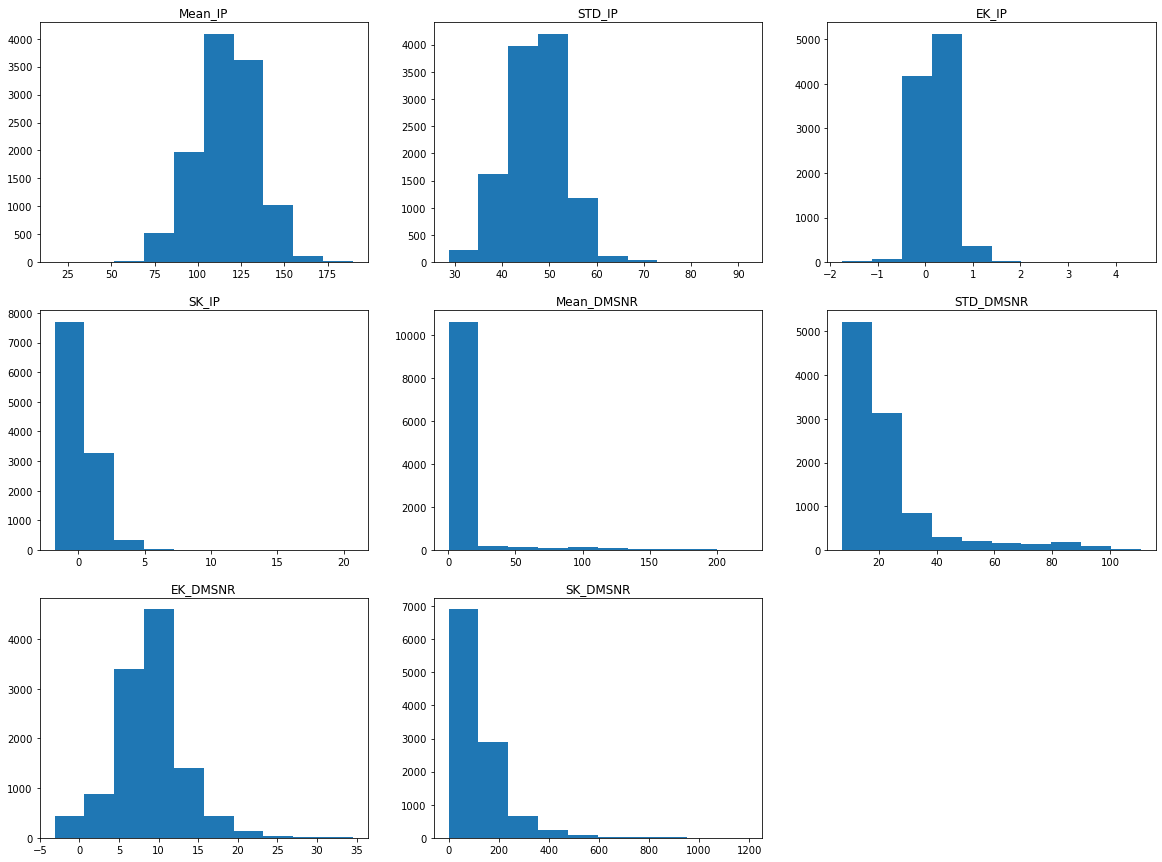

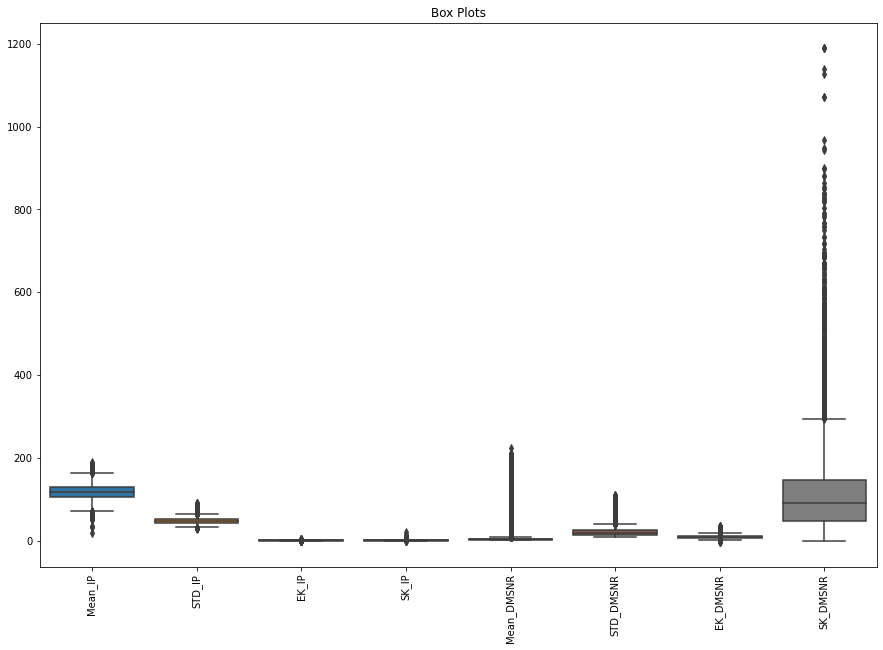

In [11]:
nonpulsar_stats = Spread(not_pulsar)
nonpulsar_stats.sum_stats()
nonpulsar_stats.hist()
nonpulsar_stats.box()

C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


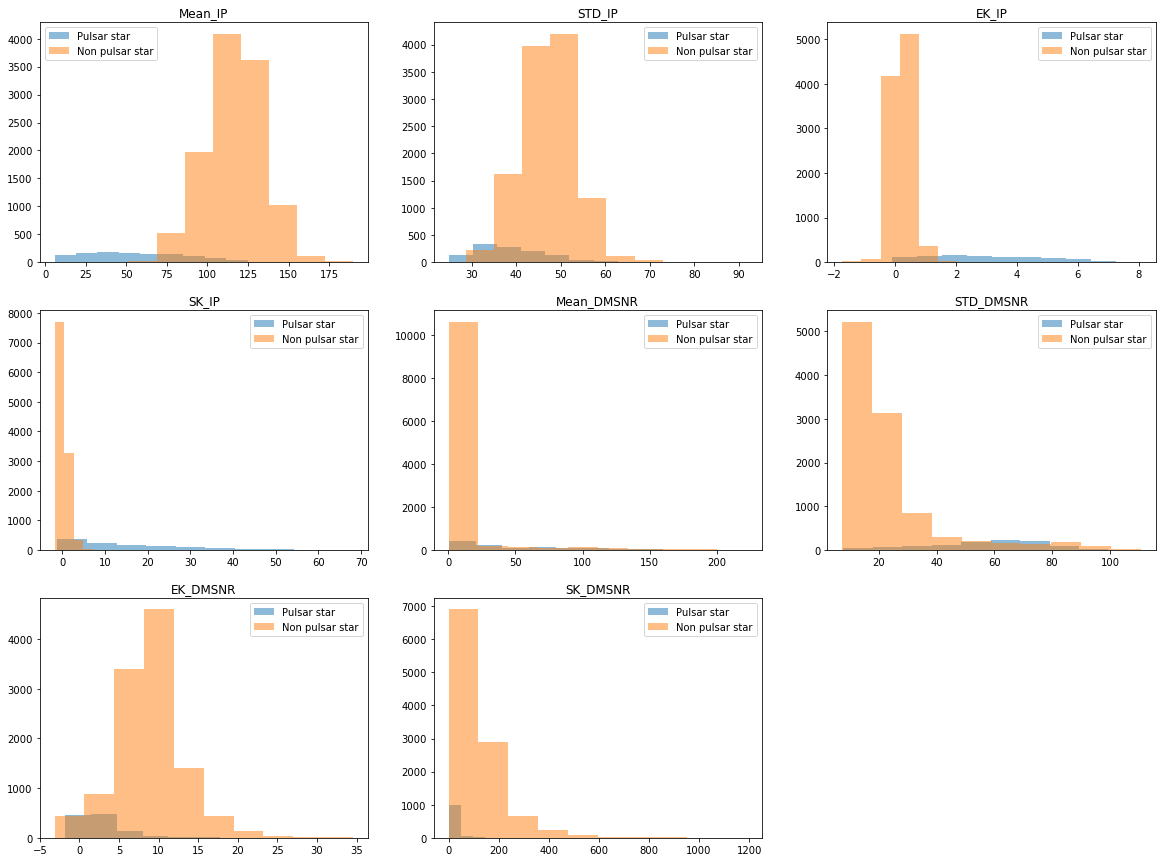

In [12]:
# overlapping histograms
over_hist(pulsar, not_pulsar)

As we can see, all of the variables have a considerable diference between pulsar and non pulsar stars.

To build the prediction model all varaiables will be considered, wich means that only one model of supervised machine learning will be built.

Before building the model there are two important task to be performed, the fullfilment of the missing values, and the normalization of the values.

The last task will allow for a better model, in the sense that will equallize the weight of all the variables.

### Filling the missing values

There are several ways to fill the missing values, but the one that seemed the most adequate for this particular dataset is imputation using k-NN. This method uses machine learning to fill the missing values based on other values with the most similar characteristics.

Although is the best method, it as a disadvantage, it's sensitive to outliers. Considering that the columns with the missing values have outliers, these do not disperse away from the core of the values, allowing for a better result.

In [13]:
#filling missin data with imputation
def fill_miss(dataset, n):
    imputer = KNNImputer(n_neighbors = n)
    imputed = imputer.fit_transform(dataset)
    df = pd.DataFrame(data=imputed, columns=pulsar.columns)
    print(df.isnull().sum())
    return df

#### Pulsar set

In [14]:
pulsar_filled = fill_miss(pulsar, 3)

Mean_IP         0
STD_IP          0
EK_IP           0
SK_IP           0
Mean_DMSNR      0
STD_DMSNR       0
EK_DMSNR        0
SK_DMSNR        0
target_class    0
dtype: int64


#### Non pulsar set

In [15]:
not_pulsar_filled = fill_miss(not_pulsar, 3)

Mean_IP         0
STD_IP          0
EK_IP           0
SK_IP           0
Mean_DMSNR      0
STD_DMSNR       0
EK_DMSNR        0
SK_DMSNR        0
target_class    0
dtype: int64


#### Test set

In [16]:
imputer = KNNImputer(n_neighbors = 3)
imputed = imputer.fit_transform(test_set)
test_set_filled = pd.DataFrame(imputed, columns = test_set.columns)
test_set_filled.isnull().sum()

Mean_IP       0
STD_IP        0
EK_IP         0
SK_IP         0
Mean_DMSNR    0
STD_DMSNR     0
EK_DMSNR      0
SK_DMSNR      0
dtype: int64

## Normalizing data

In order to allow the variables to have the simular weight in the prediction model, it's necessary to normalize the values.

Analysing the box plots its possible to see that the presence of outliers is quite substancial, meaning that the min-max normalization is not the most sensitive method. On the other hand the values from standard deviation range from 0.33 up to 107, meaning that the weight diference wil not be greatly reduced.

After considereing these facts the option is to go for the min-max normalization method.

In [47]:
def minmax(dataset):
    columns = dataset.columns
    new_arr = []
    for column in columns:
        norm = []
        min_val = dataset[column].min()
        max_val = dataset[column].max()
        for i in range(dataset.shape[0]):
            new_val = (dataset[column][i] - min_val) / (max_val - min_val)
            norm.append(new_val)
        new_arr.append(norm)
        
    new_df = pd.DataFrame(np.transpose(new_arr), columns = columns)
    if len(new_df.columns) == 9:
        new_df["target_class"] = dataset["target_class"]
        
    return new_df

In [48]:
pulsar = minmax(pulsar_filled)
not_pulsar = minmax(not_pulsar_filled)
#rejoining classisfied data
train_set = pd.concat([pulsar, not_pulsar])

test_set = minmax(test_set_filled)

C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
